In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, \
GlobalAveragePooling2D, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv("C:/Users/HP/Documents/Data_Science_course/Artificial_Nueural_Network/dsti-s20-ann/train_data.csv",header=None)
test = pd.read_csv("C:/Users/HP/Documents/Data_Science_course/Artificial_Nueural_Network/dsti-s20-ann/test_data.csv",header=None)

In [3]:
train.shape

(12000, 785)

In [4]:
test.shape

(50000, 784)

In [5]:
#test = test.drop(784,axis=1)
#train[784] = test[784]
Y_train = train[784]

# Drop 'label' column
X_train = train.drop(labels = [784],axis = 1) 

In [6]:
#X_train = train
#X = X[:, None]
#test = test.drop(784,axis=1)
#Y_train = test[784]

1.0    1330
3.0    1263
2.0    1219
6.0    1205
8.0    1194
7.0    1193
9.0    1192
0.0    1146
4.0    1131
5.0    1127
Name: 784, dtype: int64

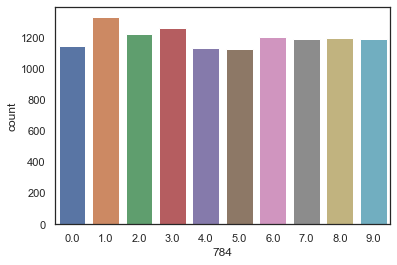

In [7]:
g = sns.countplot(Y_train)

Y_train.value_counts()

In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
# Normalize the data
#X_train = X_train / 255.0
#test = test / 255.0

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
# Set the random seed
random_seed = 2

In [14]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

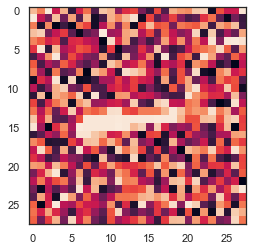

In [15]:
g = plt.imshow(X_train[1][:,:,0])

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers


layer = layers.Dense(
    units=64,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)
)

In [17]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

In [18]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

#model = Sequential()

#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 #activation ='relu', input_shape = (28,28,1)))
#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                # activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 #activation ='relu'))
#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 #activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation = "softmax"))


model = Sequential()

model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.125))
model.add(Dense(100))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax", name="predictions"))

In [19]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

In [21]:
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [22]:
# Compile the model
model.compile(optimizer = keras.optimizers.SGD(lr=0.01) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [23]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            #patience=3, 
                                            #verbose=1, 
                                            #factor=0.5, 
                                           # min_lr=0.00001)

In [24]:
epochs = 30 
batch_size = 32

In [25]:
#datagen = ImageDataGenerator(
        #featurewise_center=False,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        #featurewise_std_normalization=False,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=False,  # apply ZCA whitening
        #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip=False,  # randomly flip images
        #vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)

In [26]:
callbacks = []

In [27]:
# Fit the model
#model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              #epochs = epochs, 
                              #validation_data = (X_val,Y_val),
                              #verbose = 2, 
                              #steps_per_epoch=X_train.shape[0] // batch_size)
                             #callbacks=[learning_rate_reduction])

model.fit(X_train,Y_train, 
        batch_size=batch_size,
        epochs = epochs, 
        validation_data = (X_val,Y_val))

Epoch 1/30
300/300 [==============================] - 115s 385ms/step - loss: 2.0695 - accuracy: 0.2631 - val_loss: 2.3156 - val_accuracy: 0.1129
Epoch 2/30
300/300 [==============================] - 119s 396ms/step - loss: 1.4058 - accuracy: 0.5536 - val_loss: 1.4741 - val_accuracy: 0.4567
Epoch 3/30
300/300 [==============================] - 122s 406ms/step - loss: 0.9236 - accuracy: 0.7331 - val_loss: 1.6219 - val_accuracy: 0.5367
Epoch 4/30
300/300 [==============================] - 117s 388ms/step - loss: 0.6691 - accuracy: 0.8153 - val_loss: 0.7264 - val_accuracy: 0.7788
Epoch 5/30
300/300 [==============================] - 120s 400ms/step - loss: 0.5253 - accuracy: 0.8512 - val_loss: 0.4975 - val_accuracy: 0.8554
Epoch 6/30
300/300 [==============================] - 116s 386ms/step - loss: 0.4321 - accuracy: 0.8754 - val_loss: 0.6358 - val_accuracy: 0.7946
Epoch 7/30
300/300 [==============================] - 116s 386ms/step - loss: 0.3657 - accuracy: 0.8963 - val_loss: 0.5000 -

In [28]:
scores = model.evaluate(X_val, Y_val, batch_size=batch_size, verbose=1)

75/75 [==============================] - 6s 75ms/step - loss: 0.1607 - accuracy: 0.9504


In [29]:
print(scores)

[0.1607244461774826, 0.9504166841506958]


In [30]:
import cv2

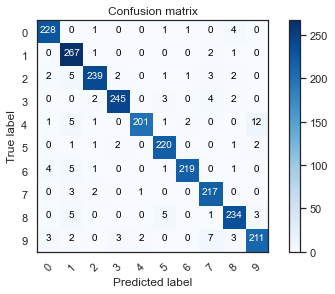

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

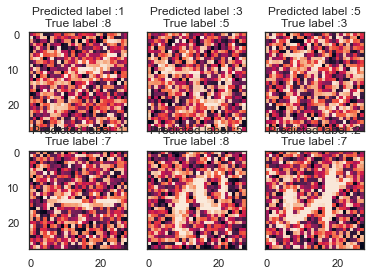

In [32]:

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
                            

In [33]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Category")

In [34]:
N = 50000

In [35]:
pred = model.predict(test[:N])

In [36]:
max_pred_score = pred.max(axis=1)

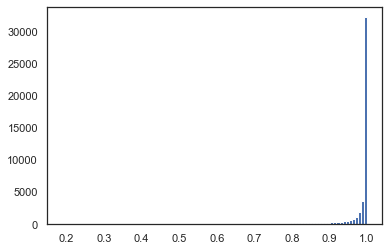

In [37]:
n, bins, patches = plt.hist(max_pred_score, bins=100)

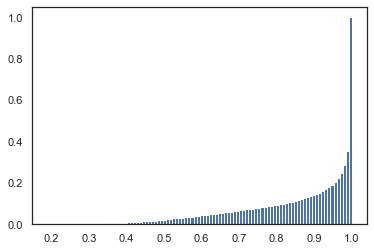

In [38]:
n, bins, patches = plt.hist(max_pred_score, bins=100, cumulative=True, density=True)

In [39]:
submission = pd.concat([pd.Series(range(0,50000),name = "Id"),results],axis = 1)

submission.to_csv("Submission.csv",index=False)


# Report



Understanding the Data.
As it was stated in the description of the assignment that the data was similar to MNIST, it was easy to see a number of codes online that had used the MNIST dataset but not a dataset similar to MNIST. The data was also split in to train and test set where the test set was much more than the train set, this seemed really unusual as it should be the other way around as we taught that it is usually 20% to 80% of test and train split respectively.
I could view the data through the pandas csv function and was able to manually split it into x train, y train, x test and y test. This was where my mistake was, I shouldn't be manually spliting the data into test and train. The train data was to be used as both train and validation while it findings would be used on the test set. It took be a while to figure this out that was why i had a terrible and stactic validation accuracy of between 9% to 11.9%. Once i figured this out all was that left was to keep twinking the code till i got the best accuracy.

Processing the data.

I could see that the number of classes chosen generally for a dataset such as this was 10, so I also chose 10. The batch size I also discovered were between 128 to 200. I used 200 initially would see how the result turns out. I went with 30 has the epoch size. As the data was flattened into a dim of 784, it had to be reshaped to a 28 by 28 pixel.

Training the model.

I decided to go with the convolution neural network (CNN) and added a lot of layers. After the first epoch run the validation accuracy was really terrible at 9.5%. Based on research it seems the model is overfitting so I have decided to add a regularizer to helps  divide by the input batch size so that the relative weighting between the weight regularizers and the activity regularizers does not change with the batch size.
With the regularizers the accuracy was still very poor. So, I decided to switch the data back to how it was ordered, though it seemed weird that the train set representing about 20 % and the test set representing 80%. 
I also noticed that another thing, that could have affected the accuracy was that I divided the images by 255, which is wrong has the images had already being converted to float, so that step wasn’t necessary. This also did not work; I got an accuracy of 12percent.
 
I finally found out what I was doing wrong my data wasn’t divided properly. I was trying the divide the dataset myself into x train, y train ,ytest and x test using dataframe methods. I also switched back the data to the right way it was given meaning that train set remained train set though it contained 12,000 while the test set contained 50,000. I finally got a validation accuracy of 90%, to see if it could be better I decided to use data augementation by using image generator and the validation accuracy was 77.67% which is far from what I got before. 
 
I removed the data augmentation, allowed a learning rate and the result was about 89%.
I changed the activation function from relu to tanh but the validation accuracy was 68.25%. So I think I would stick with the method above where I got 90%
 
I re-ran the model with the previous scenario of using relu, no learning rate and I got 87%, will stop there for now. I plotted the confusion matrix to show where the problem can be and there were a number of errors such as a number of 8s were classified and 3 and 5, the noise in the data, really affected it’s predictability. After further investigating the errors the following was discovered.
 

I had a regularization and got an accuracy of 89.26%. I am going to reduce the batch size from 200 to 64 and see if this makes a difference. Reducing the batch size to 64 gave me an accuracy of 93%. I changed the batch size to 32 and got an accuracy of 94.9%. I am going allow data augmentation with current batch size of 32 and L1 and L2 regularization and see if I get a better accuracy. After doing this my validation accuracy was 91.17%. Will try the previous strategy where I had the higher accuracy of 94.9% which was batch size 32 and I got an accuracy of 95.04%.

CONCLUSION
I would stop here, my model could be better, if I can reduce the noise some more. The confusion matrix looks so much more better.One would think data augumentation through image generator will make the model predict better because of it's features such as flipping the images and  so on but it made it worse.

